In [9]:
import pandas as pd
import matplotlib.pyplot as plt

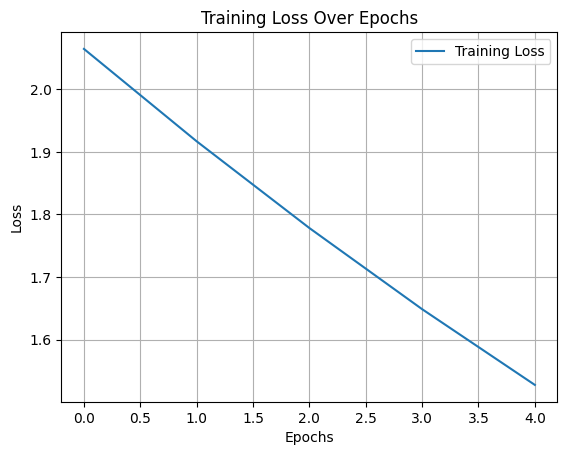

In [10]:
# Cargar el archivo CSV con pandas
df = pd.read_csv("training_loss.csv")

# Graficar la pérdida de entrenamiento
plt.plot(df["Loss"], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle

In [12]:
# 1. Cargar el vocabulario
with open("vocabulario.pkl", "rb") as f:
    vocabulario = pickle.load(f)

vocab_size = len(vocabulario)

# 2. Definir el modelo (igual que en notebook 3)
class SimpleRNN(torch.nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.embed = torch.nn.Embedding(vocab_size, embed_size)
        self.rnn = torch.nn.RNN(embed_size, hidden_size, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x = self.embed(x)
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out

# 3. Cargar el modelo ya entrenado
model = SimpleRNN(vocab_size=vocab_size, embed_size=32, hidden_size=64)
model.load_state_dict(torch.load("modelo_rnn_2.pth"))
model.eval()

SimpleRNN(
  (embed): Embedding(194, 32)
  (rnn): RNN(32, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=194, bias=True)
)

In [13]:
# 4. Extraer embeddings desde la capa de embedding
embedding_weights = model.embed.weight.detach().numpy()  # shape: (vocab_size, embed_size)


/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25126 (\N{CJK UNIFIED IDEOGRAPH-6226}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12532 (\N{KATAKANA LETTER VU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12449 (\N{KATAKANA LETTER SMALL A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

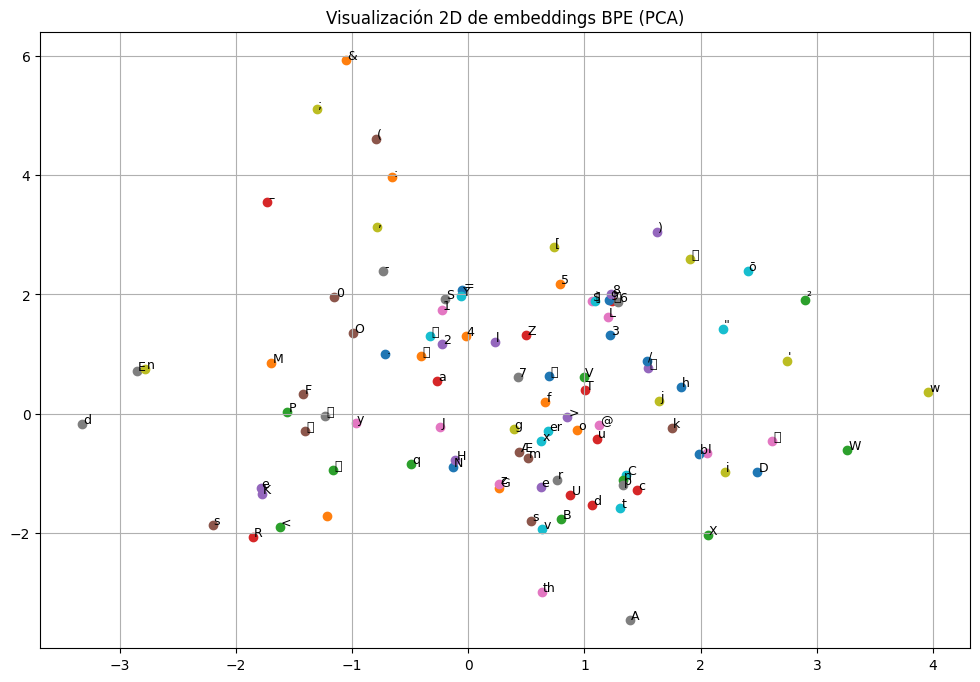

In [14]:
# 5. Visualización con PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embedding_weights)

num_tokens = 100  # ajusta según lo que quieras mostrar
plt.figure(figsize=(12, 8))
for i in range(min(num_tokens, len(vocabulario))):
    x, y = embeddings_pca[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, vocabulario[i], fontsize=9)
plt.title("Visualización 2D de embeddings BPE (PCA)")
plt.grid(True)
plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25126 (\N{CJK UNIFIED IDEOGRAPH-6226}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12532 (\N{KATAKANA LETTER VU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib

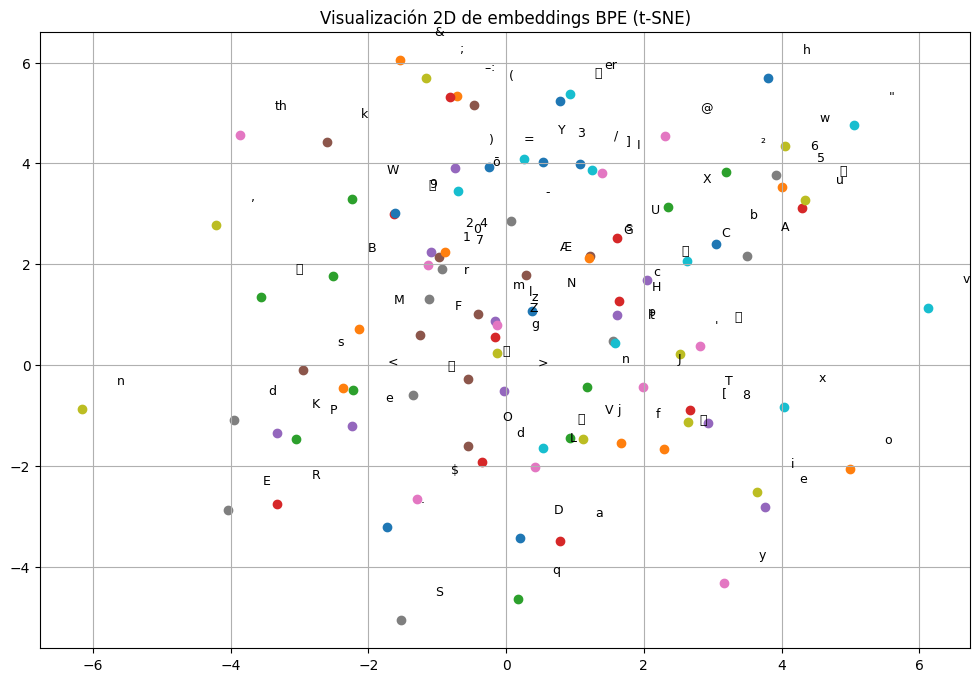

In [15]:
# 6. Visualización con t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
embeddings_tsne = tsne.fit_transform(embedding_weights)

plt.figure(figsize=(12, 8))
for i in range(min(num_tokens, len(vocabulario))):
    x, y = embeddings_tsne[i]
    plt.scatter(x, y)
    plt.text(x + 0.5, y + 0.5, vocabulario[i], fontsize=9)
plt.title("Visualización 2D de embeddings BPE (t-SNE)")
plt.grid(True)
plt.show()